In [1]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./20231116/capturetcp_c_20231116_pcap.csv", sep='@')
cond_s = df['ip.src'] == '192.168.1.78'
df_s = df[cond_s]
cond_c = df['ip.src'] == '192.168.1.79'
df_c  = df[cond_c]

cond_ack = ~df_s['tcp.analysis.acks_frame'].isna()
df_s_ack = df_s[cond_ack]
df_s_ack

,frame.number,frame.time,ip.src,ip.dst,_ws.col.protocol,frame.len,tcp.analysis.acks_frame,tcp.seq_raw,tcp.len,tcp.analysis.ack_rtt,tcp.srcport,tcp.dstport,tcp.analysis.bytes_in_flight,tcp.analysis.retransmission,tcp.analysis.fast_retransmission,tcp.analysis.out_of_order
1,2,"Nov 16, 2023 14:08:23.858389000 CST",192.168.1.78,192.168.1.79,TCP,74,1.0,419205388,0,0.003977,5050,61384,NaN,NaN,NaN,NaN
4,5,"Nov 16, 2023 14:08:23.862974000 CST",192.168.1.78,192.168.1.79,TCP,66,4.0,419205389,0,0.004185,5050,61384,NaN,NaN,NaN,NaN
6,7,"Nov 16, 2023 14:08:24.468503000 CST",192.168.1.78,192.168.1.79,TCP,66,6.0,419205389,0,0.104375,5050,61384,NaN,NaN,NaN,NaN
8,9,"Nov 16, 2023 14:08:24.979564000 CST",192.168.1.78,192.168.1.79,TCP,66,8.0,419205389,0,0.110076,5050,61384,NaN,NaN,NaN,NaN
10,11,"Nov 16, 2023 14:08:25.491530000 CST",192.168.1.78,192.168.1.79,TCP,66,10.0,419205389,0,0.116700,5050,61384,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,"Nov 16, 2023 14:09:21.924574000 CST",192.168.1.78,192.168.1.79,TCP,66,236.0,419205389,0,0.049238,5050,61384,NaN,NaN,NaN,NaN
238,239,"Nov 16, 2023 14:09:22.427816000 CST",192.168.1.78,192.168.1.79,TCP,66,238.0,419205389,0,0.047159,5050,61384,NaN,NaN,NaN,NaN
240,241,"Nov 16, 2023 14:09:22.940139000 CST",192.168.1.78,192.168.1.79,TCP,66,240.0,419205389,0,0.054166,5050,61384,NaN,NaN,NaN,NaN
242,243,"Nov 16, 2023 14:09:23.454845000 CST",192.168.1.78,192.168.1.79,TCP,66,242.0,419205389,0,0.065550,5050,61384,NaN,NaN,NaN,NaN


## Calculate Round-Trip-Time

using the calculated RTT provided by Wireshark.

In [7]:
rtt_list = []
for i in range(len(df_s_ack)-1):
    rtt_list.append((df_s_ack['tcp.analysis.ack_rtt'].iloc[i])*1000)

rtt_list

[3.9769999999999994,
 4.1850000000000005,
 104.375,
 110.076,
 116.7,
 21.05,
 27.596,
 35.937,
 40.924,
 153.66,
 62.965999999999994,
 69.179,
 79.169,
 87.655,
 90.725,
 96.89,
 111.40899999999999,
 115.496,
 20.291,
 30.499,
 37.225,
 44.596999999999994,
 50.589,
 56.492,
 64.687,
 69.58699999999999,
 77.008,
 14.059999999999999,
 90.77300000000001,
 97.489,
 109.464,
 114.402,
 21.357999999999997,
 37.187,
 33.616,
 42.934,
 47.126000000000005,
 53.848,
 61.177,
 71.837,
 107.581,
 92.917,
 97.853,
 104.539,
 128.523,
 117.74600000000001,
 31.199,
 32.849000000000004,
 44.516,
 51.5,
 58.696,
 65.447,
 77.20200000000001,
 77.78,
 84.43599999999999,
 93.304,
 102.49900000000001,
 108.932,
 127.851,
 19.977,
 30.736,
 32.641999999999996,
 44.299,
 54.315000000000005,
 59.617999999999995,
 66.27900000000001,
 79.019,
 83.705,
 296.542,
 98.10000000000001,
 104.40299999999999,
 111.18,
 119.004,
 21.988,
 29.536,
 35.166000000000004,
 42.217999999999996,
 12.129,
 158.757,
 63.389,
 71

In [8]:
# 單位是 ms
stdev = statistics.stdev(rtt_list)
mean = statistics.mean(rtt_list)
median = statistics.median(rtt_list)
print("standard deviation:", stdev)
print("mean:", mean)
print("median:", median)

standard deviation: 39.9265144467718
mean: 71.115925
median: 67.391


In [9]:
q1, q3 = np.percentile(rtt_list, [25, 75])
iqr = q3 - q1

lower_fence = q1 - (1.5*iqr)
higher_fence = q3 + (1.5*iqr)

print(q1, q3, iqr, lower_fence, higher_fence)

41.894499999999994 97.91475 56.020250000000004 -42.13587500000001 181.94512500000002


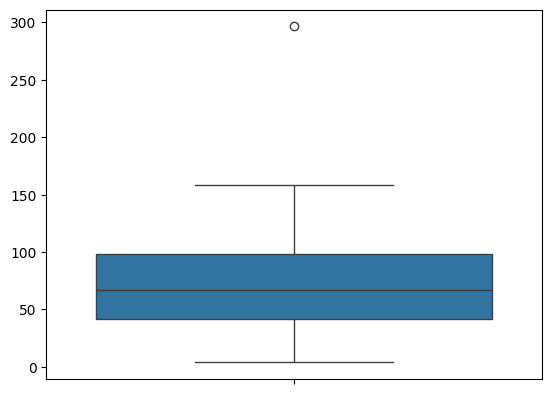

In [10]:
sns.boxplot(rtt_list)
plt.show()

## Re-Transmission